# Building ML models on Water Quality Classification for Human Consumption 
<h3>Activities</h3>
<ol type="1">
  <li> Data preparation 
     <ul> 
         <li>Data collection and loading</li>
        <li> Understanding the variables </li>
      </ul>
    </li>
    <li>Data pre-processing
        <ul>
             <li> Checking nan values  </li>
             <li> detecting outliers </li> 
             <li> checking duplicates </li>
             <li> Label encoding or scaling </li>  
         </ul>
    </li>
    <li> Exploratory Data analysis(EDA) </li>
    <li> Feature selection </li>
    <li> Supervised Learning
         <ul>
            <li> Logistic regression  </li>
            <li>  KNN </li>
            <li> Random Forest  </li>
         </ul>
    </li>
    <li> Supervised Learning
          <ul>
            <li> K-means Clustering  </li>
         </ul>
     </li> 
    
<li> Communicating the insights </li>
</ol>

In [ ]:
#for data loading, assembly, manipulation, and exploration.
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for model fitting
from sklearn.ensemble import RandomForestClassifier #ensemble model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier   # KNN regression model  
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


from sklearn.model_selection import train_test_split

#for model evaluation metrics 
from sklearn.metrics import precision_score, recall_score, f1_score

#for preprocessing( data transformation)
# for preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler

#for model selection
from sklearn.model_selection import train_test_split  #training and testing
from sklearn.model_selection import KFold, cross_val_score     # cross-validation

#for generating metrics for model evaluation
from sklearn.metrics import confusion_matrix, classification_report #evaluation 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

#for statistical models used in feature selection
import statsmodels.api as sm

#Unsupervised Learning Criterion

from sklearn.cluster import KMeans, DBSCAN # clustering algorithms
from sklearn.metrics import silhouette_score # used as a metric to evaluate the cohesion in a cluster
from sklearn.metrics import v_measure_score


from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

#for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'yellowbrick'

# SUPERVISED LEARNING

## **Data preparation**

In [2]:
# Reading in the provided data. The data was downloaded from the New York Open Data Website.

water_quality_df = pd.read_csv("water quality data.csv")
water_quality_df

C:\Users\joshu\AppData\Local\Temp\ipykernel_28132\3848898702.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  water_quality_df = pd.read_csv("water quality data.csv")


,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual Free Chlorine (mg/L),Turbidity (NTU),Fluoride (mg/L),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL)
0,202120243,07/01/2021,10:31,23650,Compliance,0.22,0.84,NaN,<1,<1
1,202120244,07/01/2021,09:54,29550,Compliance,0.69,0.81,NaN,<1,<1
2,202120245,07/01/2021,07:52,50200,Operational,0.55,0.77,NaN,<1,<1
3,202120246,07/01/2021,08:12,50250,Compliance,0.87,0.81,NaN,<1,<1
4,202120247,07/01/2021,08:31,50300,Operational,0.80,0.84,NaN,<1,<1
...,...,...,...,...,...,...,...,...,...,...
122476,202236619,12/31/2022,11:13,31550,Compliance,0.24,0.89,NaN,<1,<1
122477,202236620,12/31/2022,10:50,31750,Compliance,0.44,1.1,NaN,<1,<1
122478,202236621,12/31/2022,08:00,34650,Compliance,0.33,0.89,NaN,<1,<1
122479,202236622,12/31/2022,10:12,39950,Compliance,0.52,1.0,NaN,<1,<1


In [4]:
water_quality_df['Coliform (Quanti-Tray) (MPN /100mL)'].unique()

array(['<1', '1', '11.1', '165.2', '3.1', '2', '>200.5', '27.1', '144.5',
       '13.7', '5.3', '50.4', '69.7', '83.1', '101.3', '30.6', '4.2',
       '36.4', '6.4', '12.4', '65.9', '200.5', '40.6', '59.1', '42.9',
       nan, '7.5', '16.4', '9.9', '25.4', '20.7', '19.2', '17.8', '23.8',
       '88.5', '73.8', '45.3', '118.4', '22.2', '8.7', '62.4', '34.4',
       '15', '28.8', '78.2', '129.8', '47.8'], dtype=object)

In [5]:
water_quality_df['Turbidity (NTU)'].unique()

array(['0.84', '0.81', '0.77', '0.82', '0.78', '0.71', '0.76', '0.69',
       '0.74', '0.67', '3.89', '0.72', '0.79', '0.97', '0.18', '0.12',
       '0.33', '0.27', '0.14', '0.91', '0.8', '0.83', '0.93', '0.75',
       '0.63', '0.68', '0.64', '0.73', '0.66', '0.61', '0.7', '0.65',
       '0.52', '0.58', '0.1', '0.62', '0.6', '0.59', '0.54', '0.57',
       '0.11', '0.56', '0.55', '1.23', '0.13', '0.87', '<0.10', '0.88',
       '0.85', '0.2', '0.86', '0.15', '0.92', '1', '0.96', '0.94', '0.19',
       '0.89', '0.16', '1.21', '0.95', '0.44', '0.38', '0.98', '0.22',
       '0.53', '0.3', '4.58', '1.1', '0.29', '1.29', '0.4', '1.67',
       '0.25', '0.21', '0.26', '0.17', '0.5', '0.51', '1.4', '0.45',
       '0.47', '0.49', '0.46', '0.48', '0.24', '1.28', '0.42', '0.41',
       '0.43', '0.23', '0.39', '0.28', '0.35', '1.2', '0.32', '5.68',
       '1.18', '0.99', '1.02', '0.9', '1.46', '1.17', '1.01', '1.07',
       '1.19', '2.62', '1.06', '1.04', '0.31', '1.03', '1.09', '1.26',
       '1.42

In [6]:
water_quality_df['Residual Free Chlorine (mg/L)'].unique()

array([0.22, 0.69, 0.55, 0.87, 0.8 , 0.78, 0.6 , 0.91, 0.52, 0.71, 0.46,
       0.35, 0.19, 0.17, 0.85, 0.66, 0.59, 0.72, 0.92, 0.64, 0.81, 0.62,
       0.27, 0.5 , 0.36, 0.61, 0.41, 0.29, 0.57, 0.45, 0.28, 0.49, 0.38,
       0.65, 0.15, 0.95, 0.16, 0.43, 0.75, 0.88, 0.58, 0.42, 0.73, 0.48,
       0.39, 0.86, 0.83, 0.96, 0.63, 0.74, 0.76, 0.79, 0.23, 0.25, 0.06,
       0.05, 1.1 , 0.56, 0.54, 0.53, 0.24, 0.37, 0.51, 0.93, 0.3 , 0.12,
       0.02, 0.32, 0.98, 0.67, 0.94, 0.77, 0.7 , 0.21, 0.34, 0.82, 0.04,
       1.08, 0.99, 0.68, 0.31, 1.07, 0.2 , 1.  , 0.47, 0.44, 0.33, 0.26,
       0.97, 0.4 , 0.13, 1.05, 0.89, 1.09, 0.9 , 0.84, 0.11, 1.16, 1.15,
       1.17, 1.02, 0.01, 0.1 , 0.08, 1.03, 0.09, 0.14, 1.01, 0.18, 0.03,
       0.07, 0.  , 1.11, 1.06, 1.04, 1.19, 1.14, 1.12, 1.13, 1.3 , 1.21,
       1.18, 1.26, 1.28, 1.56, 1.33, 1.46, 1.2 , 1.23, 1.22, 1.25, 1.24,
       1.35, 1.37, 1.27, 1.42, 1.8 , 2.2 , 1.29, 1.34, 1.76,  nan])

In [7]:
water_quality_df['E.coli(Quanti-Tray) (MPN/100mL)'].unique()

array(['<1', '2', nan, '1'], dtype=object)

In [8]:
water_quality_df.sample(10)

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual Free Chlorine (mg/L),Turbidity (NTU),Fluoride (mg/L),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL)
24862,201522271,09/07/2015,10:36,1S07,Operational,0.81,0.74,0.73,<1,<1
20428,201512667,06/01/2015,09:29,31350,Compliance,0.24,1,NaN,<1,<1
99449,202012905,05/21/2020,08:26,20900,Operational,0.54,0.72,NaN,<1,<1
94869,202002985,01/30/2020,10:02,28450,Compliance,0.48,0.66,NaN,<1,<1
103326,202024042,08/27/2020,11:57,1S07,Operational,0.85,0.9,NaN,<1,<1
3203,202129038,09/13/2021,11:48,1S03A,Operational,1.10,0.81,0.67,<1,<1
54827,201721106,07/30/2017,07:38,21550,Compliance,0.30,0.48,NaN,<1,<1
28612,201530491,12/03/2015,09:50,39400,Operational,0.29,0.24,NaN,<1,<1
27577,201528261,11/09/2015,09:34,29500,Operational,0.35,0.82,NaN,<1,<1
4503,202132340,10/12/2021,12:10,42100,Operational,0.75,0.56,NaN,<1,<1


In [9]:
# Explore and analyse what data types are in our data frame for each column
water_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122481 entries, 0 to 122480
Data columns (total 10 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Sample Number                        122481 non-null  int64  
 1   Sample Date                          122481 non-null  object 
 2   Sample Time                          122481 non-null  object 
 3   Sample Site                          122481 non-null  object 
 4   Sample class                         122481 non-null  object 
 5   Residual Free Chlorine (mg/L)        122479 non-null  float64
 6   Turbidity (NTU)                      122480 non-null  object 
 7   Fluoride (mg/L)                      16038 non-null   object 
 8   Coliform (Quanti-Tray) (MPN /100mL)  122420 non-null  object 
 9   E.coli(Quanti-Tray) (MPN/100mL)      122420 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 9.3+ MB


In [10]:
# Print out all columns
water_quality_df.columns

Index(['Sample Number', 'Sample Date', 'Sample Time', 'Sample Site',
       'Sample class', 'Residual Free Chlorine (mg/L)', 'Turbidity (NTU)',
       'Fluoride (mg/L)', 'Coliform (Quanti-Tray) (MPN /100mL)',
       'E.coli(Quanti-Tray) (MPN/100mL)'],
      dtype='object')

In [11]:
# Our initial approach was to use the sample class column, however this was deemed unfit as the class does not provide 
# more information on whether water is safe or not

# Get the unique elements in sample class column
water_quality_df["Sample class"].unique() 

array(['Compliance', 'Operational', 'Resample_Compliance',
       'Resample_Operational'], dtype=object)


**Data pre-processing**

In [12]:
''' In our case, our interest is to use the columns, 'Residual Free Chlorine (mg/L)', 'Turbidity (NTU)',
       'Fluoride (mg/L)', 'Coliform (Quanti-Tray) (MPN /100mL)',
       'E.coli(Quanti-Tray) (MPN/100mL)'] 

We therefore choose only those columns to proceed for the next set of preprocessing steps. 
       '''

new_df = water_quality_df[['Residual Free Chlorine (mg/L)', 'Turbidity (NTU)',
                                       'Fluoride (mg/L)', 'Coliform (Quanti-Tray) (MPN /100mL)','E.coli(Quanti-Tray) (MPN/100mL)']]

new_df

,Residual Free Chlorine (mg/L),Turbidity (NTU),Fluoride (mg/L),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL)
0,0.22,0.84,NaN,<1,<1
1,0.69,0.81,NaN,<1,<1
2,0.55,0.77,NaN,<1,<1
3,0.87,0.81,NaN,<1,<1
4,0.80,0.84,NaN,<1,<1
...,...,...,...,...,...
122476,0.24,0.89,NaN,<1,<1
122477,0.44,1.1,NaN,<1,<1
122478,0.33,0.89,NaN,<1,<1
122479,0.52,1.0,NaN,<1,<1


In [13]:
# According to the provided metadata, the <1 can be equated to 0. We resolve this first before proceeding to the next pre-processing steps

# new_df['Coliform (Quanti-Tray) (MPN /100mL)'] = water_quality_prod['Coliform (Quanti-Tray) (MPN /100mL)'].replace({'<1':0})


In [14]:
new_df.shape # Check number of rows and columns of the dataset

(122481, 5)

In [15]:
# Checking for any Null Values in the data

new_df.isnull().sum()

Residual Free Chlorine (mg/L)               2
Turbidity (NTU)                             1
Fluoride (mg/L)                        106443
Coliform (Quanti-Tray) (MPN /100mL)        61
E.coli(Quanti-Tray) (MPN/100mL)            61
dtype: int64

In [16]:
# As noted above, we have a huge number of null values in the fluoride column. Few ways to resolve this could be used such as filling in the missing values.
# However, due to the high number of missing values, we opted to drop the column completely. 

new_df = new_df.drop('Fluoride (mg/L)', axis=1)

new_df

,Residual Free Chlorine (mg/L),Turbidity (NTU),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL)
0,0.22,0.84,<1,<1
1,0.69,0.81,<1,<1
2,0.55,0.77,<1,<1
3,0.87,0.81,<1,<1
4,0.80,0.84,<1,<1
...,...,...,...,...
122476,0.24,0.89,<1,<1
122477,0.44,1.1,<1,<1
122478,0.33,0.89,<1,<1
122479,0.52,1.0,<1,<1


In [17]:
# Investigate the top rows of the dataframe
new_df.head(5)

,Residual Free Chlorine (mg/L),Turbidity (NTU),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL)
0,0.22,0.84,<1,<1
1,0.69,0.81,<1,<1
2,0.55,0.77,<1,<1
3,0.87,0.81,<1,<1
4,0.80,0.84,<1,<1


In [18]:
# Investigate the last rows of the dataframe
new_df.tail(5)

,Residual Free Chlorine (mg/L),Turbidity (NTU),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL)
122476,0.24,0.89,<1,<1
122477,0.44,1.1,<1,<1
122478,0.33,0.89,<1,<1
122479,0.52,1.0,<1,<1
122480,0.56,0.96,<1,<1


In [19]:
new_df.info()  #Check our types before converting them to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122481 entries, 0 to 122480
Data columns (total 4 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Residual Free Chlorine (mg/L)        122479 non-null  float64
 1   Turbidity (NTU)                      122480 non-null  object 
 2   Coliform (Quanti-Tray) (MPN /100mL)  122420 non-null  object 
 3   E.coli(Quanti-Tray) (MPN/100mL)      122420 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.7+ MB


In [20]:
# This step was added after noticing string entries of the the value <0.01 in the turbidity values
# According to the provided metadata, the <1 can be equated to 0. We resolve this first before proceeding to the next pre-processing steps

# new_df = new_df.replace('<0.10',0.10)
# new_df = new_df.replace('>200.5',200.5)
# coliform
new_df['Coliform (Quanti-Tray) (MPN /100mL)'] = new_df['Coliform (Quanti-Tray) (MPN /100mL)'].replace({'<1':0, '>200.5':200.6,})

# turbidity
new_df['Turbidity (NTU)'] = new_df['Turbidity (NTU)'].replace({'<0.10':0.10})
# E.coli
new_df['E.coli(Quanti-Tray) (MPN/100mL)'] = new_df['E.coli(Quanti-Tray) (MPN/100mL)'].replace({'<1':0})

new_df


,Residual Free Chlorine (mg/L),Turbidity (NTU),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL)
0,0.22,0.84,0,0
1,0.69,0.81,0,0
2,0.55,0.77,0,0
3,0.87,0.81,0,0
4,0.80,0.84,0,0
...,...,...,...,...
122476,0.24,0.89,0,0
122477,0.44,1.1,0,0
122478,0.33,0.89,0,0
122479,0.52,1.0,0,0


In [21]:
# new_df['Coliform (Quanti-Tray) (MPN /100mL)'].unique()

In [22]:
new_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122481 entries, 0 to 122480
Data columns (total 4 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Residual Free Chlorine (mg/L)        122479 non-null  float64
 1   Turbidity (NTU)                      122480 non-null  object 
 2   Coliform (Quanti-Tray) (MPN /100mL)  122420 non-null  object 
 3   E.coli(Quanti-Tray) (MPN/100mL)      122420 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.7+ MB


In [23]:
new_df.isnull().sum()

Residual Free Chlorine (mg/L)           2
Turbidity (NTU)                         1
Coliform (Quanti-Tray) (MPN /100mL)    61
E.coli(Quanti-Tray) (MPN/100mL)        61
dtype: int64

In [24]:
# convert column to float and then round to 1 decimal place
new_df['Turbidity (NTU)'] = round(new_df['Turbidity (NTU)'].astype(float), 1)

# convert column to float and then round to 1 decimal place
new_df['Coliform (Quanti-Tray) (MPN /100mL)'] = round(new_df['Coliform (Quanti-Tray) (MPN /100mL)'].astype(float), 1)

# convert column to float and then round to 1 decimal place
new_df['E.coli(Quanti-Tray) (MPN/100mL)'] = round(new_df['E.coli(Quanti-Tray) (MPN/100mL)'].astype(float), 1)

In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122481 entries, 0 to 122480
Data columns (total 4 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Residual Free Chlorine (mg/L)        122479 non-null  float64
 1   Turbidity (NTU)                      122480 non-null  float64
 2   Coliform (Quanti-Tray) (MPN /100mL)  122420 non-null  float64
 3   E.coli(Quanti-Tray) (MPN/100mL)      122420 non-null  float64
dtypes: float64(4)
memory usage: 3.7 MB


In [26]:
# Replace NaN and infinite values with the mean value of the column. 

new_df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [27]:
new_df = new_df.fillna(0)

In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122481 entries, 0 to 122480
Data columns (total 4 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Residual Free Chlorine (mg/L)        122481 non-null  float64
 1   Turbidity (NTU)                      122481 non-null  float64
 2   Coliform (Quanti-Tray) (MPN /100mL)  122481 non-null  float64
 3   E.coli(Quanti-Tray) (MPN/100mL)      122481 non-null  float64
dtypes: float64(4)
memory usage: 3.7 MB


In [29]:

new_df.sample(5)

,Residual Free Chlorine (mg/L),Turbidity (NTU),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL)
13528,0.35,0.7,0.0,0.0
56963,0.73,0.6,0.0,0.0
105267,0.68,0.7,0.0,0.0
3560,0.87,0.6,0.0,0.0
118686,0.70,0.6,0.0,0.0


In [30]:
# Checking for any Null Values in the resulting data set

new_df.isnull().sum()


Residual Free Chlorine (mg/L)          0
Turbidity (NTU)                        0
Coliform (Quanti-Tray) (MPN /100mL)    0
E.coli(Quanti-Tray) (MPN/100mL)        0
dtype: int64

In [31]:
# new_df['Coliform (Quanti-Tray) (MPN /100mL)'].unique()

In [32]:
#Use a formula to come up with our y values

residual_chlorine_threshold = 1.0 # mg/L
turbidity_threshold = 5 # NTU
coliform_threshold = 0 # MPN/100ml
e_coli_threshold = 0 # MPN/100ml


# define your conditions
condition1 = lambda x: x <= residual_chlorine_threshold;
condition2 = lambda x: x <= turbidity_threshold;
condition3 = lambda x: x <= coliform_threshold;
condition4 = lambda x: x <= e_coli_threshold;


# apply the conditions to each row and create a new column 'result'
new_df['DrinkableOrNot'] = new_df.apply(lambda row: int(condition1(row['Residual Free Chlorine (mg/L)']) and condition2(row['Turbidity (NTU)']) \
                                                   and condition3(row['Coliform (Quanti-Tray) (MPN /100mL)']) and \
                                                   condition4(row['E.coli(Quanti-Tray) (MPN/100mL)'])), axis=1)

new_df.sample(10)

,Residual Free Chlorine (mg/L),Turbidity (NTU),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL),DrinkableOrNot
113153,0.38,0.1,0.0,0.0,1
104755,0.71,0.8,0.0,0.0,1
20293,0.50,0.7,0.0,0.0,1
98243,0.27,0.6,0.0,0.0,1
85508,0.45,0.5,0.0,0.0,1
44418,0.70,0.9,0.0,0.0,1
74016,0.14,0.5,0.0,0.0,1
54154,0.40,0.5,0.0,0.0,1
86868,0.40,0.5,0.0,0.0,1
6939,0.57,0.9,0.0,0.0,1


In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122481 entries, 0 to 122480
Data columns (total 5 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Residual Free Chlorine (mg/L)        122481 non-null  float64
 1   Turbidity (NTU)                      122481 non-null  float64
 2   Coliform (Quanti-Tray) (MPN /100mL)  122481 non-null  float64
 3   E.coli(Quanti-Tray) (MPN/100mL)      122481 non-null  float64
 4   DrinkableOrNot                       122481 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 MB


In [34]:
#Rename columns for easier exploration and better view when exploring the various features

df = pd.DataFrame(new_df)
df.columns = ["Chlorine", "Turbidity", "Coliform", "E.Coli", "DrinkableOrNot"]

df.sample(5)

,Chlorine,Turbidity,Coliform,E.Coli,DrinkableOrNot
23016,0.85,0.5,0.0,0.0,1
106743,0.47,0.8,0.0,0.0,1
62024,0.58,0.8,0.0,0.0,1
29188,0.64,0.8,0.0,0.0,1
48835,0.56,1.0,0.0,0.0,1


In [35]:
df['DrinkableOrNot'].unique()

array([1, 0], dtype=int64)

## Data Exploration

1    0.978715
0    0.021285
Name: DrinkableOrNot, dtype: float64


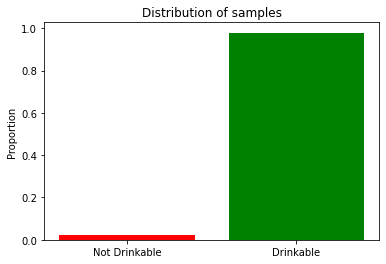

In [36]:
# Count number of values per class
drinkable_column = df['DrinkableOrNot'].value_counts(normalize=True)
print(drinkable_column)

# ploting the weight of each class for easy interpretation
# sns.countplot(drinkable_column)
plt.bar(drinkable_column.index, drinkable_column.values, color=['green','red'])
plt.xticks([0,1], ['Not Drinkable', 'Drinkable'])
plt.ylabel('Proportion')
plt.title('Distribution of samples')
plt.show()

In [37]:
# #explanatory variables
# # df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
# ax = df.plot.bar(x=["Chlorine", "Turbidity", "Coliform", "E.Coli"], y='DrinkableOrNot', rot=0)

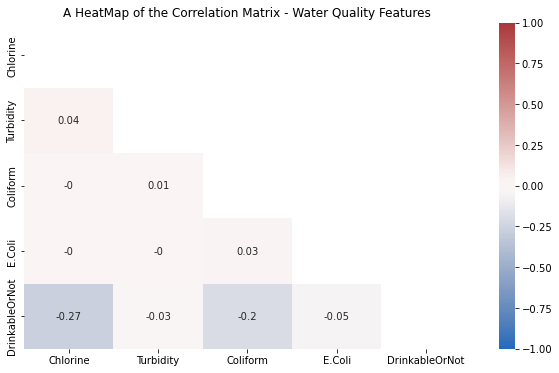

In [38]:
#Correlation Matrix between the four variables to understand the correlation between them.

df_corr = df.corr().round(2)    #Find the correlation matrix, rounded off to two decimal places

plt.rcParams["figure.figsize"] = (10,6)
plt.title('A HeatMap of the Correlation Matrix - Water Quality Features')
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

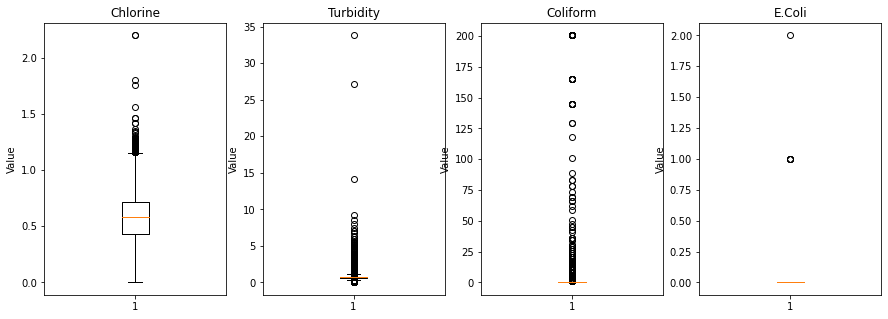

In [39]:
# Univariate analysis: Create box plots to identify the presence of any outliers

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, col in enumerate(['Chlorine', 'Turbidity', 'Coliform', 'E.Coli']):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
    axs[i].set_ylabel('Value')


plt.show()



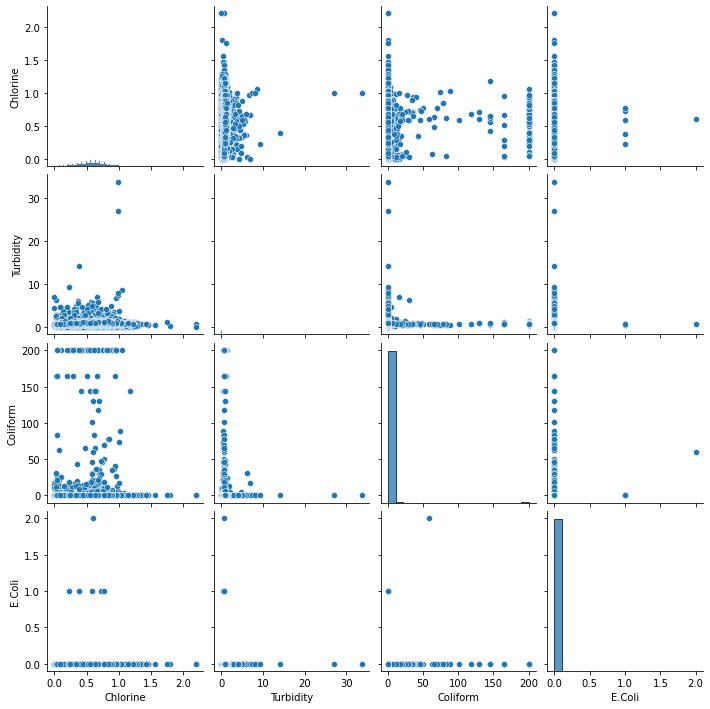

In [40]:
# Pairwise Bivariate Analysis
sns.pairplot(data=df, vars=['Chlorine', 'Turbidity', 'Coliform', 'E.Coli'])
plt.show()

In [41]:
df['DrinkableOrNot'].unique()

array([1, 0], dtype=int64)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122481 entries, 0 to 122480
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Chlorine        122481 non-null  float64
 1   Turbidity       122481 non-null  float64
 2   Coliform        122481 non-null  float64
 3   E.Coli          122481 non-null  float64
 4   DrinkableOrNot  122481 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 MB


## Data Scaling using standard scaler

In [43]:
# handling outliers using standard scaling 
# defining the independent and dependent variables
# x = df.iloc[:,:-1]  # independent variables
# y = df['DrinkableOrNot']

In [44]:

# # # scaling independent variables
# scaler=StandardScaler() # scales data to unit variance
# x_value=scaler.fit_transform(x) # computes mean and stdev and then uses this to transform data

# # dumping the scaled independent variables in a dataframe
# x = pd.DataFrame(x_value, columns= x.columns)
# x


In [45]:
df

,Chlorine,Turbidity,Coliform,E.Coli,DrinkableOrNot
0,0.22,0.8,0.0,0.0,1
1,0.69,0.8,0.0,0.0,1
2,0.55,0.8,0.0,0.0,1
3,0.87,0.8,0.0,0.0,1
4,0.80,0.8,0.0,0.0,1
...,...,...,...,...,...
122476,0.24,0.9,0.0,0.0,1
122477,0.44,1.1,0.0,0.0,1
122478,0.33,0.9,0.0,0.0,1
122479,0.52,1.0,0.0,0.0,1


## Handling outliers: Imputation by replacing outliers with  median 

In [46]:
# detecting outliers and replace them with the median of each column 
df_copy = df.iloc[:,:-1]   # creating a copy of the data
medians = df_copy.median()    # geting the median of the data columnwise

# # looping through each column to find outliers and replace them with the median of its whole column
for column in df_copy.columns:
    if column == "marker":
        continue
    q1=df_copy.quantile(0.25)  # 25th percentile
    q3=df_copy.quantile(0.75)  # 75th percentile
    IQR=q3-q1
    lower_bound = q1[column]-(1.5*IQR[column])
    upper_bound = q3[column]+(1.5*IQR[column]) 
    df_copy[column] = np.where((df_copy[column] > upper_bound) | (df_copy[column] < lower_bound),medians[column],df_copy[column] )



In [47]:
df.iloc[:,-1:] 

,DrinkableOrNot
0,1
1,1
2,1
3,1
4,1
...,...
122476,1
122477,1
122478,1
122479,1


In [48]:
# finaln df after removing outliers
df_copy['DrinkableOrNot'] = df.iloc[:,-1:] 

In [49]:
df_copy

,Chlorine,Turbidity,Coliform,E.Coli,DrinkableOrNot
0,0.22,0.8,0.0,0.0,1
1,0.69,0.8,0.0,0.0,1
2,0.55,0.8,0.0,0.0,1
3,0.87,0.8,0.0,0.0,1
4,0.80,0.8,0.0,0.0,1
...,...,...,...,...,...
122476,0.24,0.9,0.0,0.0,1
122477,0.44,1.1,0.0,0.0,1
122478,0.33,0.9,0.0,0.0,1
122479,0.52,1.0,0.0,0.0,1


In [50]:
df['DrinkableOrNot'].unique()

array([1, 0], dtype=int64)

In [51]:
df_copy.iloc[:,:-1]

,Chlorine,Turbidity,Coliform,E.Coli
0,0.22,0.8,0.0,0.0
1,0.69,0.8,0.0,0.0
2,0.55,0.8,0.0,0.0
3,0.87,0.8,0.0,0.0
4,0.80,0.8,0.0,0.0
...,...,...,...,...
122476,0.24,0.9,0.0,0.0
122477,0.44,1.1,0.0,0.0
122478,0.33,0.9,0.0,0.0
122479,0.52,1.0,0.0,0.0


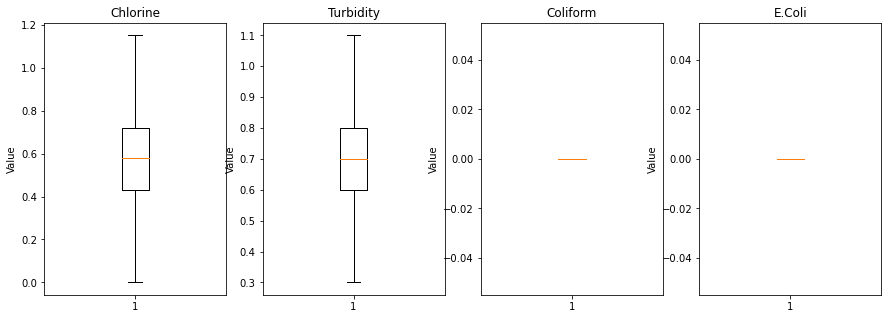

In [52]:
# plotting after handling outliers
# Univariate analysis: Create box plots to identify the presence of any outliers after handling them

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, col in enumerate(df_copy.iloc[:,:-1]):
    axs[i].boxplot(df_copy[col])
    axs[i].set_title(col)
    axs[i].set_ylabel('Value')


plt.show()


## Data Scaling after imputation

In [53]:
# defining the independent and dependent variables
x = df_copy.iloc[:,:-1]  # independent variables
y = df_copy['DrinkableOrNot']
x

,Chlorine,Turbidity,Coliform,E.Coli
0,0.22,0.8,0.0,0.0
1,0.69,0.8,0.0,0.0
2,0.55,0.8,0.0,0.0
3,0.87,0.8,0.0,0.0
4,0.80,0.8,0.0,0.0
...,...,...,...,...
122476,0.24,0.9,0.0,0.0
122477,0.44,1.1,0.0,0.0
122478,0.33,0.9,0.0,0.0
122479,0.52,1.0,0.0,0.0


In [54]:

# # # scaling independent variables
scaler=StandardScaler() # scales data to unit variance
x_value=scaler.fit_transform(x) # computes mean and stdev and then uses this to transform data

# dumping the scaled independent variables in a dataframe
x = pd.DataFrame(x_value, columns= x.columns)
x


,Chlorine,Turbidity,Coliform,E.Coli
0,-1.644708,0.413039,0.0,0.0
1,0.566872,0.413039,0.0,0.0
2,-0.091897,0.413039,0.0,0.0
3,1.413860,0.413039,0.0,0.0
4,1.084475,0.413039,0.0,0.0
...,...,...,...,...
122476,-1.550599,1.073750,0.0,0.0
122477,-0.609501,2.395174,0.0,0.0
122478,-1.127105,1.073750,0.0,0.0
122479,-0.233062,1.734462,0.0,0.0


# Model Building(Logistic regression,KNN, Random forest)



In [55]:
# # defining the independent and dependent variables
# x = df_copy.iloc[:,:-1]  # independent variables
# y = df_copy['DrinkableOrNot']

In [56]:
# x

In [57]:
# y.sample(20)

In [58]:
# split the data for training and testing using train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) # 70% training set and 30% test set

# getting the shape of the splitted data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((85736, 4), (36745, 4), (85736,), (36745,))

In [59]:
y_train.unique()

array([1, 0], dtype=int64)

In [60]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85736 entries, 51737 to 8060
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Chlorine   85736 non-null  float64
 1   Turbidity  85736 non-null  float64
 2   Coliform   85736 non-null  float64
 3   E.Coli     85736 non-null  float64
dtypes: float64(4)
memory usage: 3.3 MB


In [61]:
def graph_confusion_matrix(cmatrix):
    # Print the confusion matrix using Matplotlib
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(cmatrix, cmap='Accent')
    for i in range(cmatrix.shape[1]):
        for j in range(cmatrix.shape[0]):
            ax.text(x=j, y=i,s=cmatrix[i, j], va='center', ha='center', size='large')

    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.title('Confusion Matrix', fontsize=12)
    plt.show()

# Logistic regression

Logistic regression accuracy: 0.9817117975234726
Mean squared error: 0.018288202476527418


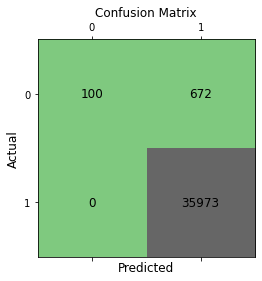

Classification Report:

Precision:0.982
Recall:0.982
f1-score:0.975


In [62]:
# instatiate the model
log_reg = LogisticRegression()

# train the model 
log_reg.fit(x_train,y_train)  

# perform prediction on x_test
y_pred = log_reg.predict(x_test)
y_pred

# check performance using accuracy
print("Logistic regression accuracy:", accuracy_score(y_test,y_pred))
print("Mean squared error:", mean_squared_error(y_test,y_pred))
acc_1 = accuracy_score(y_test,y_pred)
#Metrics
cmatrix=confusion_matrix(y_test, y_pred)
graph_confusion_matrix(cmatrix)

print("Classification Report:")
c_report=classification_report(y_test,y_pred,output_dict=True)
#print(c_report)
logistic_regression_precision=c_report['weighted avg']['precision']
logistic_regression_recall=c_report['weighted avg']['recall']
logistic_regression_f1score=c_report['weighted avg']['f1-score']
print()
print(f"Precision:{logistic_regression_precision:.3f}\nRecall:{logistic_regression_recall:.3f}\
\nf1-score:{logistic_regression_f1score:.3f}")


## KNearest Neigbors

knn accuracy: 0.9868825690570145
Mean squared error: 0.01311743094298544


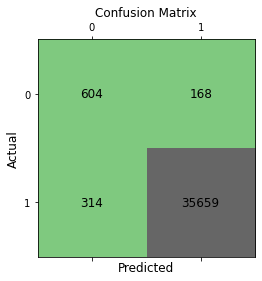

Classification Report:

Precision:0.988
Recall:0.987
f1-score:0.987


In [63]:
# instatiate the model
knn = KNeighborsClassifier(n_neighbors=2)

# train the model 
knn.fit(x_train,y_train)  

# perform prediction on x_test
y_predict = knn.predict(x_test)
y_predict

# # check performance using accuracy
print("knn accuracy:",accuracy_score(y_test,y_predict))
print("Mean squared error:", mean_squared_error(y_test,y_predict))
acc_2 = accuracy_score(y_test,y_predict)


#Metrics
cmatrix=confusion_matrix(y_test, y_predict)
graph_confusion_matrix(cmatrix)

print("Classification Report:")
c_report=classification_report(y_test,y_predict,output_dict=True)
#print(c_report)
knn_precision=c_report['weighted avg']['precision']
knn_recall=c_report['weighted avg']['recall']
knn_f1score=c_report['weighted avg']['f1-score']
print()
print(f"Precision:{knn_precision:.3f}\nRecall:{knn_recall:.3f}\
\nf1-score:{knn_f1score:.3f}")


## Random forest

Random forest accuracy: 0.9951285889236631
Mean squared error: 0.004871411076336917


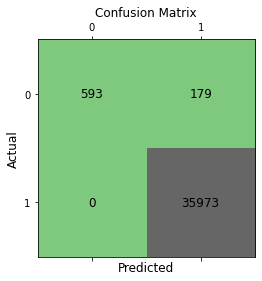

Classification Report:

Precision:0.995
Recall:0.995
f1-score:0.995


In [64]:
 # build random forest classifier
randomf = RandomForestClassifier(random_state=42)

# train the model 
randomf.fit(x_train,y_train)       

# perform prediction on x_test
y_predicted=randomf.predict(x_test)
y_predicted

# check performance using accuracy
print("Random forest accuracy:",accuracy_score(y_test,y_predicted))
print("Mean squared error:", mean_squared_error(y_test,y_predicted))

#Metrics
cmatrix=confusion_matrix(y_test, y_predicted)
graph_confusion_matrix(cmatrix)

print("Classification Report:")
c_report=classification_report(y_test,y_predicted,output_dict=True)
#print(c_report)
rf_precision=c_report['weighted avg']['precision']
rf_recall=c_report['weighted avg']['recall']
rf_f1score=c_report['weighted avg']['f1-score']
print()
print(f"Precision:{rf_precision:.3f}\nRecall:{rf_recall:.3f}\
\nf1-score:{rf_f1score:.3f}")


### Feature selection using forward feature selection

In [65]:
#forward regression method from https://github.com/AakkashVijayakumar/stepwise-regression/blob/master/stepwise_regression/step_reg.py
# defining dependent and independent variables 
x  # independent variables
y = df['DrinkableOrNot']       # the last variable as independent variable

selected_features=[]

# forward selection
def forward_regression(X, y, verbose=False):
                       
    top_variable = []               # keeps the most significant variables
    
    while True:
        changed=False
        least_significant = list(set(X.columns)-set(top_variable))      # the least significant variables
        new_pvalue = pd.Series(index=least_significant)
        for values in least_significant:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[top_variable+[values]]))).fit() 
            new_pvalue[values] = model.pvalues[values]
        best_pvalue = new_pvalue.min()
        if best_pvalue < 0.05:                 # the best pvalue is the pvalue with less than 0.05 threshold
            best_variable = new_pvalue.idxmin()
            top_variable.append(best_variable)
            changed=True
            if True:
                print('Add {:20} with p-value {:.6}'.format(best_variable, best_pvalue))
                selected_features.append(best_variable) #storing the added feature

        if not changed:
            break
    print(model.summary())

forward_regression(x,y,verbose=True)

C:\Users\joshu\AppData\Local\Temp\ipykernel_28132\1301834008.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pvalue = pd.Series(index=least_significant)
C:\Users\joshu\AppData\Local\Temp\ipykernel_28132\1301834008.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pvalue = pd.Series(index=least_significant)


Add Chlorine             with p-value 0.0
Add Turbidity            with p-value 6.12573e-51


C:\Users\joshu\AppData\Local\Temp\ipykernel_28132\1301834008.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pvalue = pd.Series(index=least_significant)
C:\Users\joshu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                            OLS Regression Results                            
Dep. Variable:         DrinkableOrNot   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     3827.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:04:52   Log-Likelihood:                 66998.
No. Observations:              122481   AIC:                        -1.340e+05
Df Residuals:                  122478   BIC:                        -1.340e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9787      0.000   2446.156      0.0

# Model Training After Feature Selection

In [66]:
# defining the independent and dependent variables
x = df_copy.iloc[:,:2]  # independent variables   - Choose only Chlorine and Turbidity

y = df_copy['DrinkableOrNot']

In [67]:
x

,Chlorine,Turbidity
0,0.22,0.8
1,0.69,0.8
2,0.55,0.8
3,0.87,0.8
4,0.80,0.8
...,...,...
122476,0.24,0.9
122477,0.44,1.1
122478,0.33,0.9
122479,0.52,1.0


In [68]:
y

0         1
1         1
2         1
3         1
4         1
         ..
122476    1
122477    1
122478    1
122479    1
122480    1
Name: DrinkableOrNot, Length: 122481, dtype: int64

In [69]:
# split the data for training and testing using train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) # 70% training set and 30% test set

# getting the shape of the splitted data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((85736, 2), (36745, 2), (85736,), (36745,))

# Logistic Regression - After Feature Selection


Logistic regression accuracy: 0.9811402911960811
Mean squared error: 0.0188597088039189


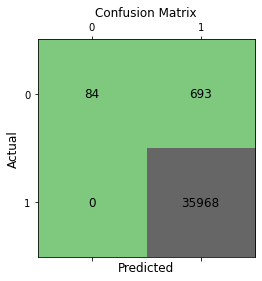

Classification Report:

Precision:0.981
Recall:0.981
f1-score:0.974


In [70]:
# instatiate the model
log_reg = LogisticRegression()

# train the model 
log_reg.fit(x_train,y_train)  

# perform prediction on x_test
y_pred = log_reg.predict(x_test)
y_pred

# check performance using accuracy
print("Logistic regression accuracy:", accuracy_score(y_test,y_pred))
print("Mean squared error:", mean_squared_error(y_test,y_pred))

#Metrics
cmatrix=confusion_matrix(y_test, y_pred)
graph_confusion_matrix(cmatrix)

print("Classification Report:")
c_report=classification_report(y_test,y_pred,output_dict=True)
#print(c_report)
logistic_regression_precision=c_report['weighted avg']['precision']
logistic_regression_recall=c_report['weighted avg']['recall']
logistic_regression_f1score=c_report['weighted avg']['f1-score']
print()
print(f"Precision:{logistic_regression_precision:.3f}\nRecall:{logistic_regression_recall:.3f}\
\nf1-score:{logistic_regression_f1score:.3f}")


# KNN - After Feature Selection

knn accuracy: 0.9860661314464553
Mean squared error: 0.0139338685535447


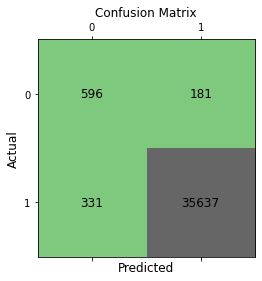

Classification Report:

Precision:0.988
Recall:0.986
f1-score:0.987


In [71]:
# instatiate the model
knn = KNeighborsClassifier(n_neighbors=2)

# train the model 
knn.fit(x_train,y_train)  

# perform prediction on x_test
y_predict = knn.predict(x_test)
y_predict

# # check performance using accuracy
print("knn accuracy:",accuracy_score(y_test,y_predict))
print("Mean squared error:", mean_squared_error(y_test,y_predict))

#Metrics
cmatrix=confusion_matrix(y_test, y_predict)
graph_confusion_matrix(cmatrix)

print("Classification Report:")
c_report=classification_report(y_test,y_predict,output_dict=True)
#print(c_report)
knn_precision=c_report['weighted avg']['precision']
knn_recall=c_report['weighted avg']['recall']
knn_f1score=c_report['weighted avg']['f1-score']
print()
print(f"Precision:{knn_precision:.3f}\nRecall:{knn_recall:.3f}\
\nf1-score:{knn_f1score:.3f}")


# Random Forest - After Feature Selection

Random forest accuracy: 0.9944754388352157
Mean squared error: 0.005524561164784324


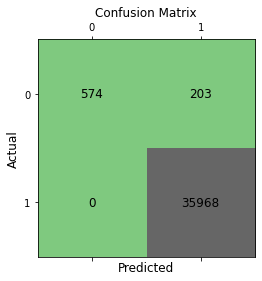

Classification Report:

Precision:0.995
Recall:0.994
f1-score:0.994


In [72]:
 # build random forest classifier
randomf = RandomForestClassifier(random_state=42)

# train the model 
randomf.fit(x_train,y_train)       

# perform prediction on x_test
y_predicted=randomf.predict(x_test)
y_predicted

# check performance using accuracy
print("Random forest accuracy:",accuracy_score(y_test,y_predicted))
print("Mean squared error:", mean_squared_error(y_test,y_predicted))

#Metrics
cmatrix=confusion_matrix(y_test, y_predicted)
graph_confusion_matrix(cmatrix)

print("Classification Report:")
c_report=classification_report(y_test,y_predicted,output_dict=True)
#print(c_report)
rf_precision=c_report['weighted avg']['precision']
rf_recall=c_report['weighted avg']['recall']
rf_f1score=c_report['weighted avg']['f1-score']
print()
print(f"Precision:{rf_precision:.3f}\nRecall:{rf_recall:.3f}\
\nf1-score:{rf_f1score:.3f}")


# Unsupervised Learning - Attempting to learn the classes


In [73]:
x

,Chlorine,Turbidity
0,0.22,0.8
1,0.69,0.8
2,0.55,0.8
3,0.87,0.8
4,0.80,0.8
...,...,...
122476,0.24,0.9
122477,0.44,1.1
122478,0.33,0.9
122479,0.52,1.0


In [ ]:
# Scale the data using StandardScaler --> To use unsupervised machine learning models, we need to perform standard scaling

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

x

,Chlorine,Turbidity,Coliform,E.Coli
0,-1.644708,0.413039,0.0,0.0
1,0.566872,0.413039,0.0,0.0
2,-0.091897,0.413039,0.0,0.0
3,1.413860,0.413039,0.0,0.0
4,1.084475,0.413039,0.0,0.0
...,...,...,...,...
122476,-1.550599,1.073750,0.0,0.0
122477,-0.609501,2.395174,0.0,0.0
122478,-1.127105,1.073750,0.0,0.0
122479,-0.233062,1.734462,0.0,0.0




# K-Means Clustering

In [ ]:
# Utility Functions

def plotSilhouette(data,k):
    model = SilhouetteVisualizer(KMeans(n_clusters=k),colors='yellowbrick')
    model.fit(data)
    model.show()


def plotElbow(data,metric):
    model=KMeans()
    visualizer=KElbowVisualizer(model, k=(2,15), metric=metric, timings=True)
    visualizer.fit(data)
    visualizer.show()


Deciding on the Number of Clusters

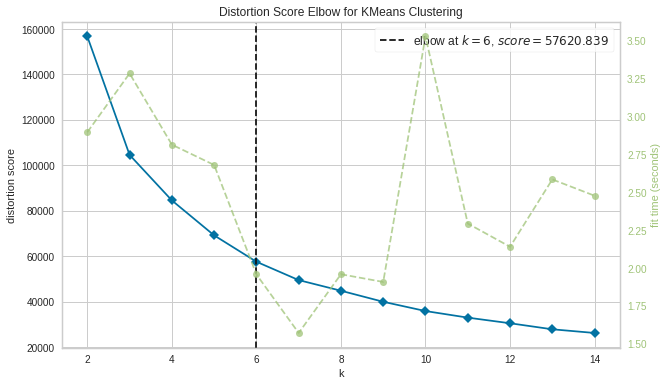

In [ ]:
#metric='silhouette'
#metric='calinski_harabasz'

metric='distortion'
plotElbow(x,metric)

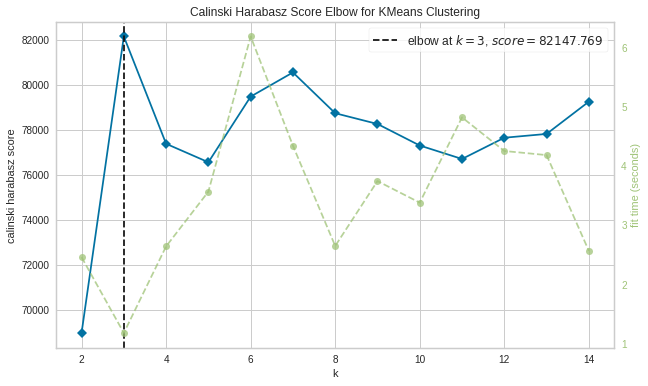

In [ ]:
#metric='silhouette'
metric='calinski_harabasz'
#metric='distortion'
plotElbow(x,metric)

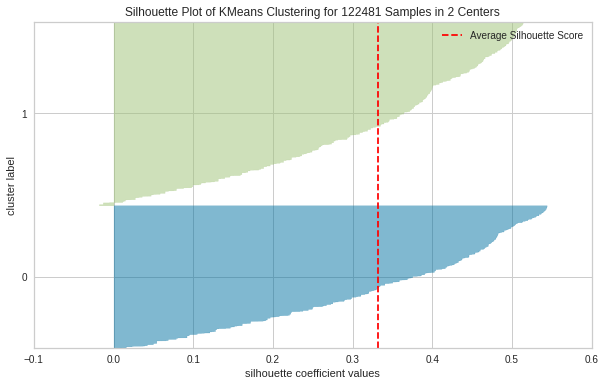

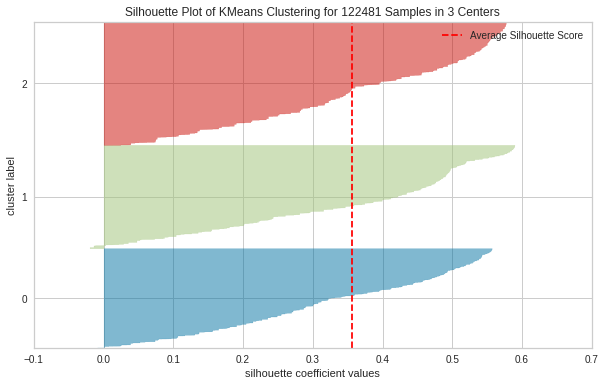

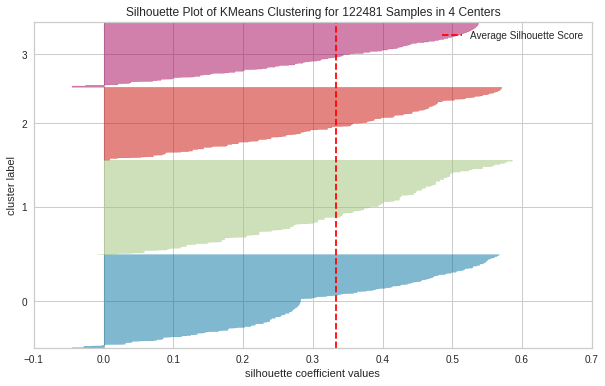

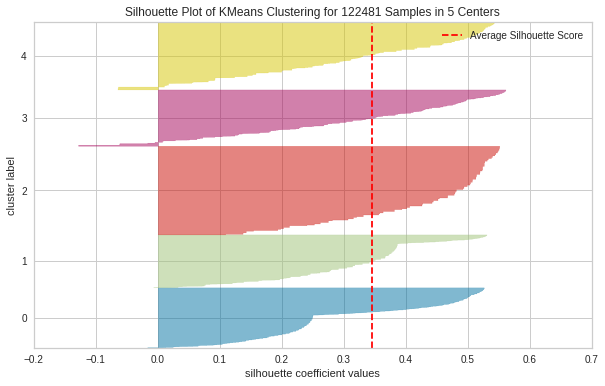

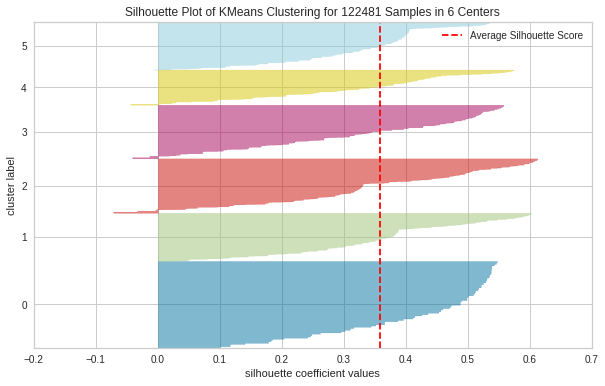

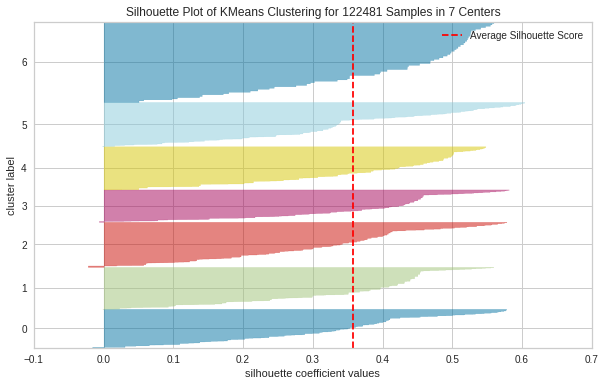

In [ ]:
for k in range(2,8):
    plotSilhouette(x,k)

# Perfom clustering using K-Means


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(x)
x["clusters"] = cluster_labels

In [ ]:
cluster_labels

array([1, 0, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
# Calculate silhouette_score
print(silhouette_score(x, kmeans.labels_))

0.5015847481834738


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(x)
x["clusters"] = cluster_labels

In [ ]:
# Calculate silhouette_score
print(silhouette_score(x, kmeans.labels_))

0.38109871772213755
